In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Hartmann

## Parámetros característicos

Las ecuaciones MHD dan una manera efectiva para describir la interacciones del plasma o otros fluidos conductores sujetos a campos magnéticos. A nivel de la teoría cinética el plasma se describe por los momentos de la ecuación de Boltzmann usando las ecuaciones de Maxwell. Es importante destacar que para las deducciones MHD utilizadas se desprecian los efectos de la relatividad especial, la cuasi-neutralidad de la carga y la medición de las variables desde una escala macroscópica. Estas consideraciones nos llevan desde la teoría cinética hasta el modelo macroscópico MHD

### Relación entre energía cinética y energía magnética

$\beta$ es un indicador 

$$\beta = \frac{2\mu_{o}\rho\nu^{2}}{B_{o}^{2}} \longrightarrow\quad\frac{\text{Energía cinética}}{\text{Energía magnética}}$$

$\beta >> 1 \rightarrow$  el flujo hidrodinámico domina sobre el fluido magnético. Sin embargo el sistema está influenciado por el campo magnético lo que pasa es que el mayor aporte es hidrodinámico

$\beta << 1 \rightarrow$ EL campo magnético domina el movimiento de las partículas de fluido





### Número de Reynolds magnético

El número de Reynolds mgnético es la relación de la convección magnética a l;a difusión magnética. Esto describe la evolución del campo magnético inducido en las partículas de fluidos. Para Números de Reynolds altos, el fluido es altamente conductivo. Para bajos números de Reynolds tenemos el desacople del campo de velocidades y el campo magnético, por tanto no se tiene una conducción tan alta


$$R_{m} = \frac{\mu_{o}\nu L}{\eta} = \frac{\nu L}{\sigma} \rightarrow \frac{\text{Convección}}{\text{Difusión}} = \frac{\mu_{o}\left[(\mathbf{v}\cdot\nabla)\mathbf{B}-(\mathbf{B}\cdot\nabla)\mathbf{v}\right]}{\eta\nabla^{2}\mathbf{B}}$$




### Parámetro de interacción

La interacción es una parámetro importante porque relaciona quién domina sobre la evolución de la estructura del fluido. 

$$N=\frac{\sigma B^{2}L}{\rho u} \longrightarrow \frac{\text{Fuerza de Lorentz}}{\text{Fuerza inercial}}$$

Importante para caracterizar la dinámica de la vorticidad y la influencia del campo magnético en el proceso de la turbulencia

### Número de Hartmann

Este número es importante para estudiar las fronteras bajo la influencia del campo magnético.

$H >> 1 \rightarrow$ El ancho de la capa límite se acortará debido a la redirección del momento causado por la fuerza de Lorentz

$H<<1 \rightarrow$ El ancho de la capa límite se vuelve más ancho dado que la fuerza de lorentz es despreciable

$$H = \frac{B_{o} L}{\sqrt{\rho_{o}\eta\nu}}\longrightarrow \frac{\text{Fuerza de Lorentz}}{\text{Fuerza viscosa}}$$

## Flujo de Hartmann 

Vamos a situarnos en la aplicación del modelo de lattice Boltzmann estudiado estudiando un problema de la magnetohidrodinámica lineal, llamado flujo de Hartmann. Este sistema es uno de los pocos sistemas que tiene solución analítica dentro del formalismo MHD. Solamente se considera que la densidad es constante y coeficientes de transporte constantes.

La configuración de Hartmann consiste en un fluido conductor a lo largo de una tubería, en el régimen estacionario y bajo la acción de un campo magnético transversal. Todas las cantidades importantes, a excepción de la presión, son función solamente de las coordenadas transversales 

$$\mathbf{v} = \mathbf{v}(0,v_{x},0) \qquad \mathbf{B} = \mathbf{B}(B_{o},B_{y}(x),0)$$. Un gradiente de presión uniforme a lo largo de la dirección $y$, entonces  P = P(y). Las paredes son puestas en $-L,L$. Para este caso , las ecuaciones incompresibles MHD resultan

$$\frac{\partial \mathbf{v}}{\partial t}$$



Las ecuaciones obtenidas son las siguientes

$$b(x) = \frac{FL}{B_{o}}\left(\frac{sinh\left(\frac{Hx}{L}\right)}{sinh(H)}-\frac{x}{L}\right)\qquad u(x) = \frac{FL}{\sqrt{\rho_{o}B_{o}}}\sqrt{\frac{\eta}{\nu}}coth(H)\left(1-\frac{cosh\left(\frac{Hx}{L}\right)}{cosh(H)}\right)$$




In [3]:
def Hart(x,H):
    F = 1.0;L = 1.0;Bo = 1.0;rhoo = 1.0
    eta = 1.0; nu =1.0
    #H = Bo*L/(np.sqrt(rhoo*nu*eta))
    u = (F*L)/(np.sqrt(rhoo*Bo))*np.sqrt(eta/nu)*(1/np.tanh(H))*(1-((np.cosh(H*x/L))/(np.cosh(H)))) 
    b = ((F*L)/(Bo))*(((np.sinh(H*x/L))/(np.sinh(H)))-x/L)
    return [u,b]
    
    
    

## Perfil de velocidades

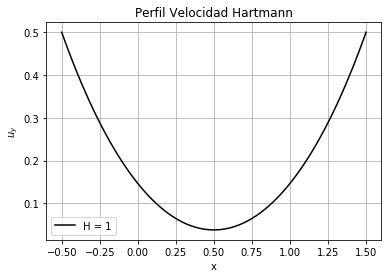

In [211]:
X = np.linspace(-1,1,256)
plt.plot(X+0.5,-Hart(X,1)[0]+0.5,"k-",label= "H = 1")
#plt.plot(X+0.5,-Hart(X,10)[0]+0.5,"b-",label= "H = 10")
#plt.plot(X+0.5,-Hart(X,0.1)[0]+0.5,"r-",label= "H = 0.1")
plt.xlabel("x")
plt.ylabel("$u_{y}$")
plt.title("Perfil Velocidad Hartmann")
plt.grid(True)
plt.legend()
plt.savefig("Perfil_Hartmann")

## Campo magnético

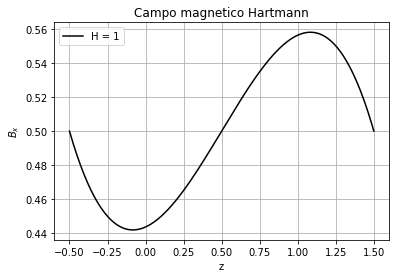

In [214]:
X = np.linspace(-1,1,256)
plt.plot(X+0.5,-Hart(X,1)[1]+0.5,"k-",label= "H = 1")
#plt.plot(X+0.5,-Hart(X,10)[1]+0.5,"b-",label= "H = 10")
#plt.plot(X+0.5,-Hart(X,0.1)[1]+0.5,"r-",label= "H = 0.1")
plt.xlabel("z")
plt.ylabel("$B_{x}$")
plt.title("Campo magnetico Hartmann")
plt.grid(True)
plt.legend()
plt.savefig("Magnetico_Hartmann")

## Función que lee los archivos producidos desde c++

In [70]:
def Lectura(ux,uy,uz):
    Ux = np.loadtxt(ux, unpack = True)
    Uy = np.loadtxt(uy, unpack = True)
    Uz = np.loadtxt(uz, unpack = True)
    return Ux,Uy,Uz
    


def Grafica(udat,vdat,xdat,ydat,linea):
    uesc = 1.0#dx/dt
    u = np.loadtxt(udat, unpack = True)
    v = np.loadtxt(vdat, unpack = True)
    x = np.loadtxt(xdat, unpack = True)
    y = np.loadtxt(ydat, unpack = True)
    #rho = np.loadtxt(rhodat, unpack = True)
    X = np.linspace(0,1,50)

    f, axarr = plt.subplots(1,2, figsize=(24,6))
    st = f.suptitle("$\\tau = 0.6$", fontsize=25)
    st.set_y(1.0)
    pasos = 12
    M= np.hypot(u, v)
    #axarr[0].streamplot(x,y,u,v, color="k",linewidth=0.8,density=1.0, arrowstyle='->', arrowsize=1.5)
    im=axarr[0].quiver(x,y,u,v,M , cmap=plt.cm.jet,width=0.022,scale=1/0.1)
    axarr[0].set_title("Campos",fontsize = 20)
    axarr[0].set_xlim(-0.01,1)
    axarr[0].set_xlabel("$x[m]$",fontsize = 20)
    axarr[0].set_ylabel("$y[m]$",fontsize = 20)
    axarr[0].tick_params(axis="x", labelsize=20)
    axarr[0].tick_params(axis="y", labelsize=20)
    
    axarr[1].plot(x,v[linea,:],"b", label = "Simulacion")
    #axarr[1].plot(X,uesc*uy(X,nul,gl,Pl),"r+", label = "Teorica")
    #axarr[1].set_ylim(-0.1*uesc,0)
    axarr[1].legend()
    axarr[1].grid(True)
    axarr[1].set_title('Perfil de Velocidad',fontsize = 20,y=1.0)
    axarr[1].set_xlabel("$x[m]$",fontsize = 20)
    axarr[1].set_ylabel("$v[m/s]$",fontsize =20)
    axarr[1].tick_params(axis="x", labelsize=20)
    axarr[1].tick_params(axis="y", labelsize=20)
    
    cbar = f.colorbar(im, ax=axarr, shrink = 1.0)
    cbar.set_label('$v[m/s]$',fontsize =20)
    cbar.ax.tick_params(labelsize=20)
    

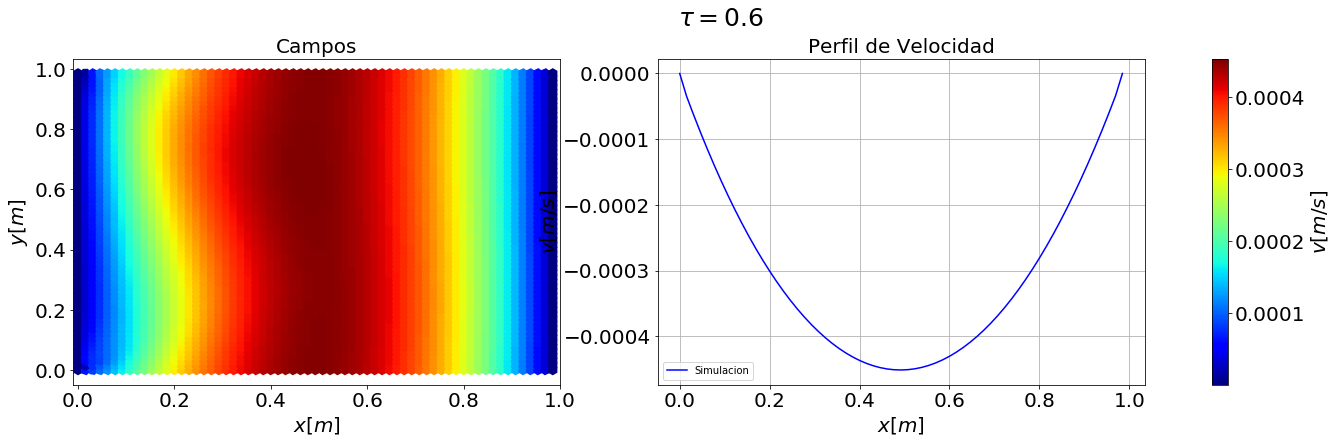

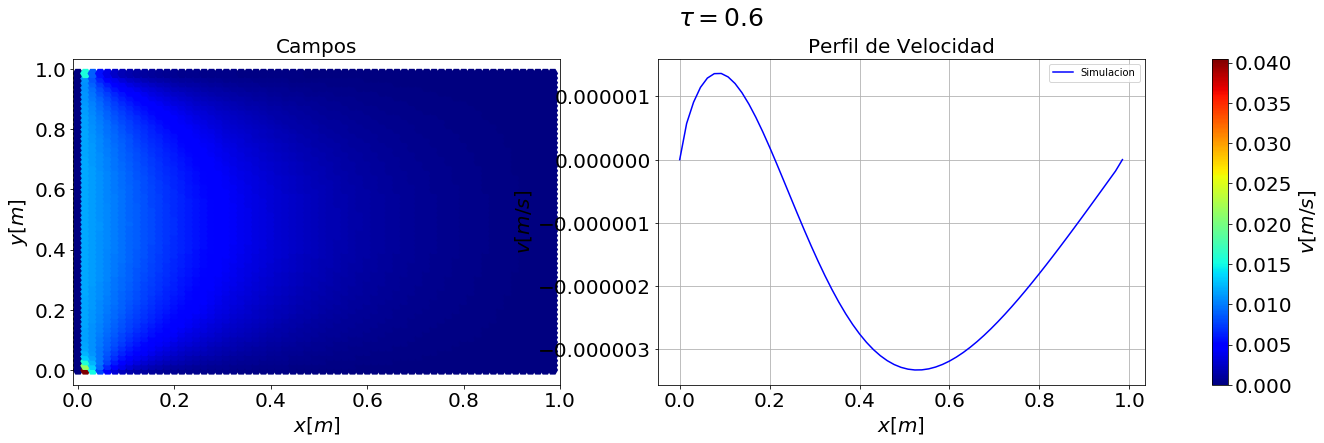

In [165]:
ux ,uy, uz = Lectura("vx.dat","vy.dat","vz.dat")
x, y, z = Lectura("x.dat","y.dat","z.dat")

Grafica("vx.dat","vy.dat","x.dat","y.dat",32)
plt.savefig("velocidad")
Grafica("Bx.dat","Bz.dat","x.dat","y.dat",32)
plt.savefig("Magentico")




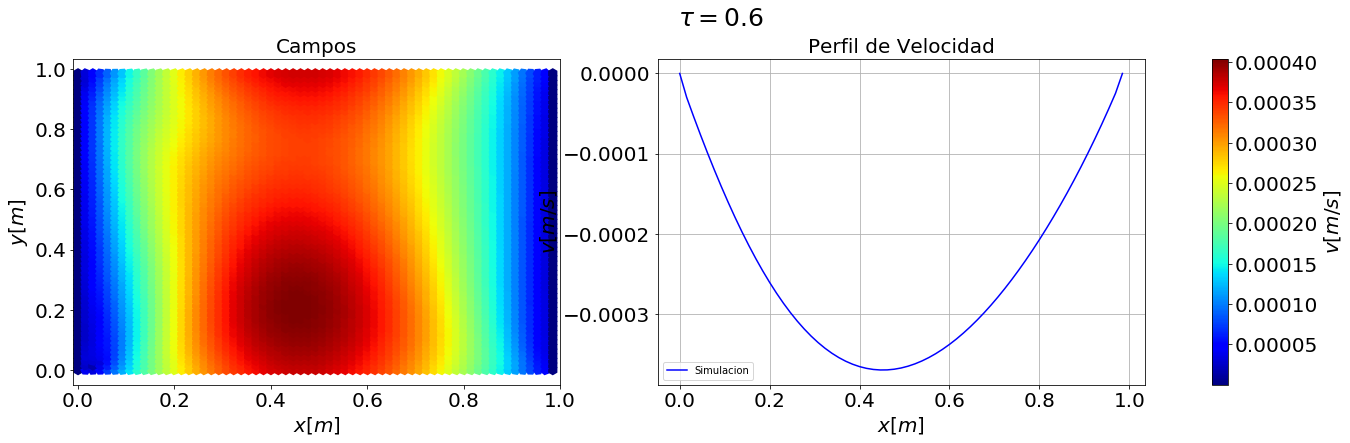

In [144]:
Grafica("vx.dat","vy.dat","x.dat","y.dat",32)

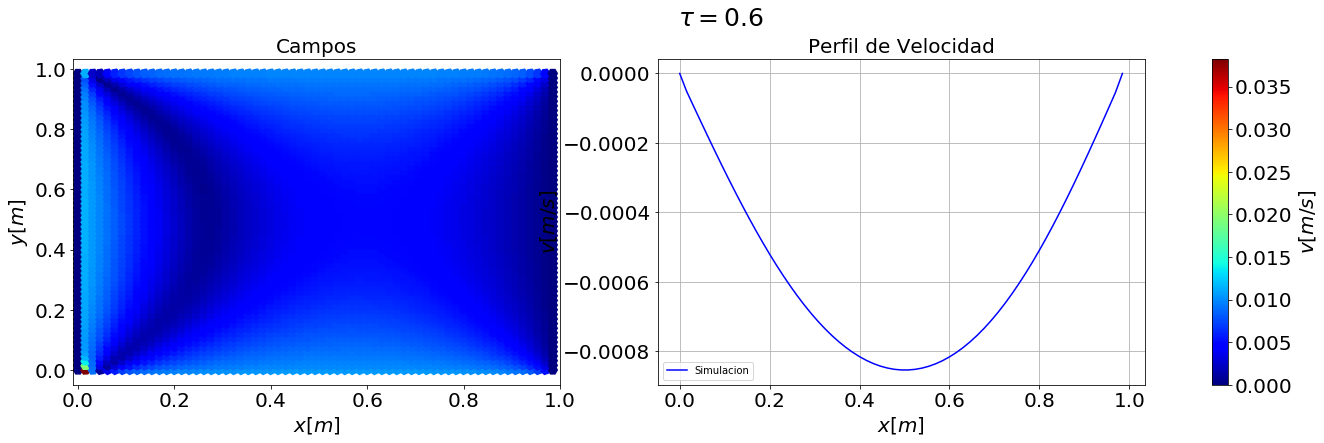

In [148]:
Grafica("Bx.dat","By.dat","x.dat","z.dat",32)

array([-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001,
       -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001,
       -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001,
       -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001,
       -0.0001, -0.0001, -0.0001, -0.0001, -0.0001])

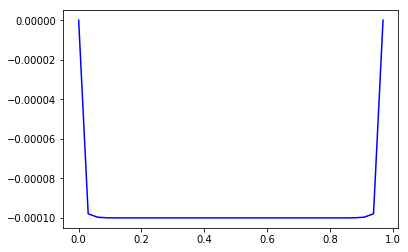

In [104]:
plt.plot(x,Bx[16,:],"b", label = "Simulacion")
#axarr[1].plot(X,uesc*uy(X,nul,gl,Pl),"r+", label = "Teorica")
#axarr[1].set_ylim(-0.1*uesc,0)
#axarr[1].legend()
#axarr[1].grid(True)
#axarr[1].set_title('Perfil de Velocidad',fontsize = 20,y=1.0)
#axarr[1].set_xlabel("$x[m]$",fontsize = 20)
#axarr[1].set_ylabel("$v[m/s]$",fontsize =20)
#axarr[1].tick_params(axis="x", labelsize=20)
#axarr[1].tick_params(axis="y", labelsize=20)
Bz[32,:]

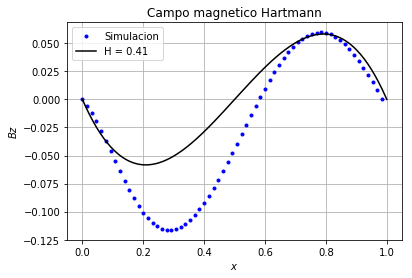

In [149]:
Bx ,By, Bz = Lectura("Bx.dat","By.dat","Bz.dat")
ux ,uy, uz = Lectura("vx.dat","vy.dat","vz.dat")
x, y, z = Lectura("x.dat","y.dat","y.dat")


plt.plot(x,5e3*(Bz[32,:]),"b.",label = "Simulacion")
X = np.linspace(-1,1,256)
plt.plot(0.5*X + 0.5,-Hart(X,1)[1],"k-",label= "H = 0.41")
plt.legend()
plt.title("Campo magnetico Hartmann")
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$Bz$")
plt.savefig("Haartmannprofile")


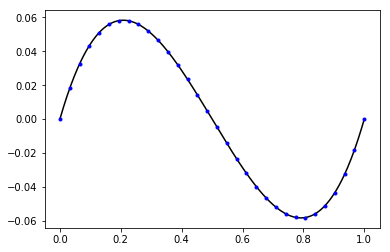

In [23]:
X = np.linspace(-1,1,256)
Xp = np.linspace(-1,1,32)
plt.plot(0.5*X + 0.5,Hart(X,1)[1],"k-",label= "H = 1")
plt.plot(0.5*Xp + 0.5,Hart(Xp,1)[1],"b.",label= "H = 1")

In [275]:
nuL = (1/3)*(0.9-0.5)
nuL

0.13333333333333333

In [277]:
64*0.1*3/23

0.8347826086956524

In [276]:
771/(0.1*30)

257.0

In [1]:
%ls

Bx.dat                    Hartmann2.cpp             vy1.dat
Bx1.dat                   Magnetico_Hartmann.png    vz.dat
By.dat                    Perfil_Hartmann.png       vz1.dat
By1.dat                   Primer_Resultado/         x.dat
Bz.dat                    README.md                 x1.dat
Bz1.dat                   a.out*                    y.dat
FiniteMode/               job.sh*                   y1.dat
Graficas  Hartmann.ipynb  rho.dat                   z.dat
H*                        vx.dat                    z1.dat
H.ld_HzrmUY               vx1.dat
H.ld_WNom5p               vy.dat


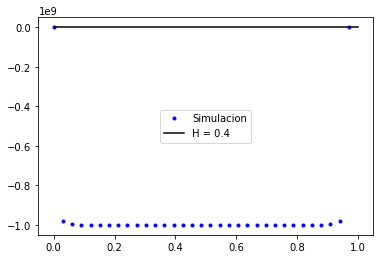

In [68]:
#Bx ,By, Bz = Lectura("Primer_Resultado/Bx.dat","Primer_Resultado/By.dat","Primer_Resultado/Bz.dat")
#ux ,uy, uz = Lectura("Primer_Resultado/vx.dat","Primer_Resultado/vy.dat","Primer_Resultado/vz.dat")
#x, y, z = Lectura("Primer_Resultado/x.dat","Primer_Resultado/y.dat","Primer_Resultado/y.dat")


plt.plot(x,1e13*Bx[18,:],"b.",label = "Simulacion")
X = np.linspace(-1,1,256)
plt.plot(0.5*X + 0.5,-Hart(X,0.43)[1],"k-",label= "H = 0.4")
plt.legend()

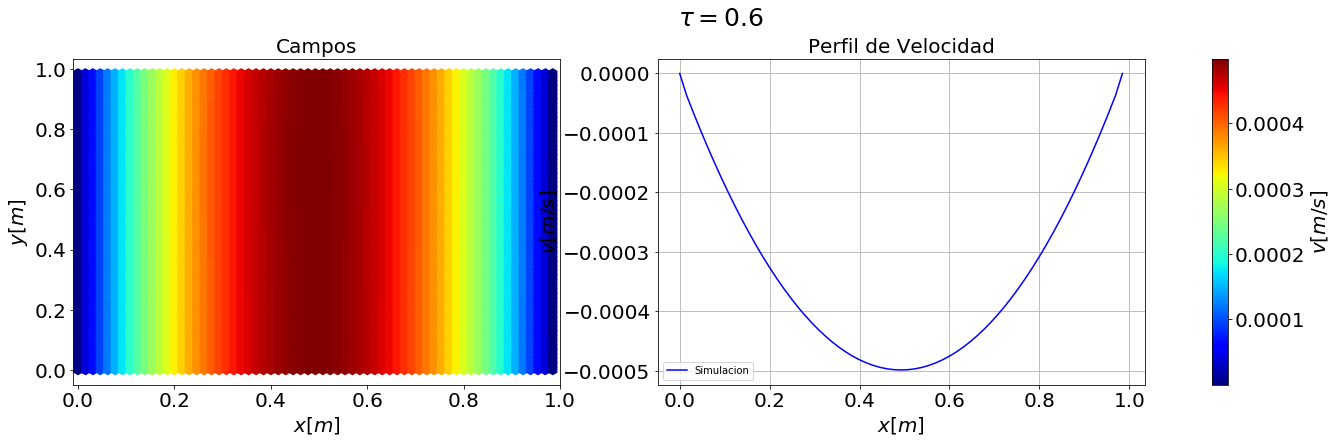

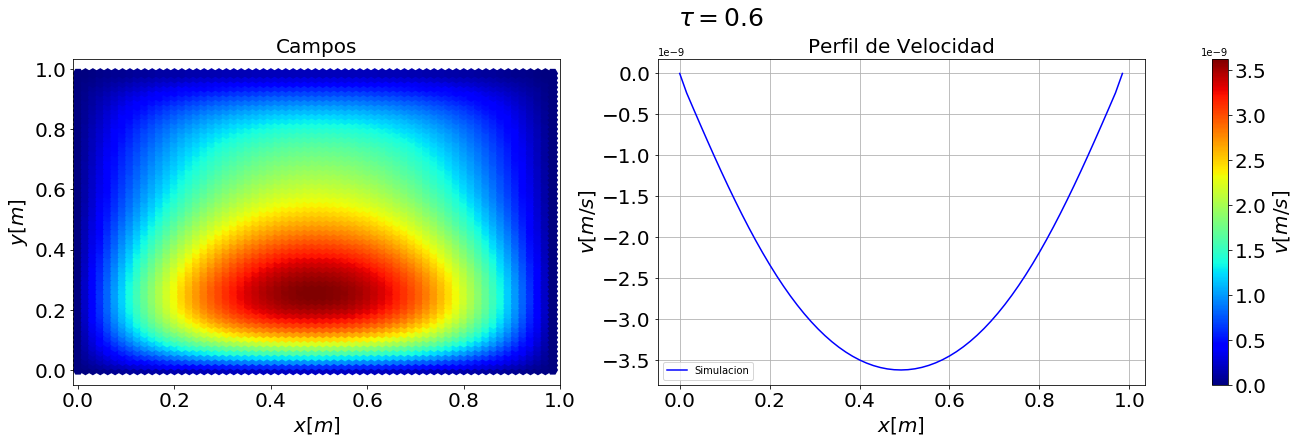

In [67]:
add = "Primer_Resultado/"
Grafica(add+"vx.dat",add+"vy.dat",add+"x.dat",add+"y.dat",16)
Grafica(add+"Bz.dat",add+"By.dat",add+"x.dat",add+"y.dat",16)


In [194]:
np.shape(uy)

(65, 3)